In [9]:
import os
import sys
import pandas as pd
import numpy as np
sys.path.append(os.path.dirname(os.path.abspath(os.getcwd())) + "/..")
if os.getcwd().endswith("Topic3"):
    os.chdir("..")
    print(f"Changed to {os.getcwd()}")

from codebase import load_demograhics, load_buurt_data, willingness_to_cycle, add_willingness_to_cycle_column, punt_buurt_code_column

In [10]:
mode = "fiets"
punt1 = "basis"
location = "Universities"

df_demographics = load_demograhics()
df_punt = load_buurt_data(punt1, mode=mode)

Loaded file from CSV


In [11]:
df_punt.describe()

,reistijd_min,reisafstand_m,afstand_hemelsbreed_m,omrijdfactor
count,6.439109e+06,6.439109e+06,6.439109e+06,6.439109e+06
mean,7.463722e+01,2.087758e+04,1.703860e+04,1.234843e+00
std,4.662304e+01,8.471591e+03,6.810772e+03,1.493644e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.200000e+01,1.482300e+04,1.205900e+04,1.160000e+00
50%,7.700000e+01,2.203800e+04,1.814300e+04,1.210000e+00
75%,9.600000e+01,2.760600e+04,2.281700e+04,1.270000e+00
max,3.362000e+03,1.282240e+05,3.207500e+04,8.335000e+01


In [12]:
df_punt[punt_buurt_code_column].unique()

array(['BU04411103', 'BU08730300', 'BU07180401', ..., 'BU01710323',
       'BU00930523', 'BU00930215'], shape=(14406,), dtype=object)

Demographics and filtered dataframes do not match in length: 14405 vs 14406, ignoring missing values


c:\Users\toell\Documents\GitHub\Design-of-AI-driven-business-operation\codebase\plotting\plots.py:102: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='upper right', fontsize='small')
c:\Users\toell\Documents\GitHub\Design-of-AI-driven-business-operation\codebase\plotting\plots.py:102: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right', fontsize='small')


<Figure size 1000x1000 with 0 Axes>

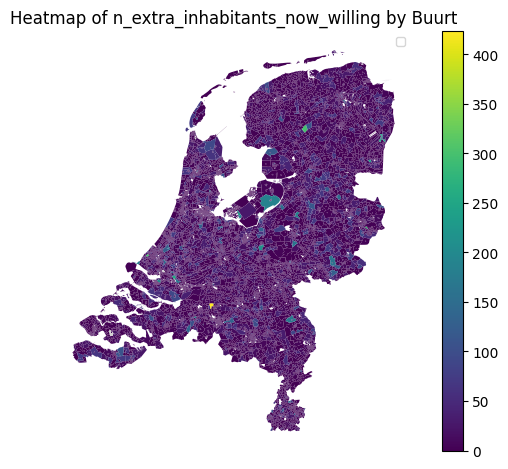

In [16]:
from codebase import calculate_added_willingness, demographics_a_15_24
improvement_column="n_extra_inhabitants_now_willing"
df_with_willingness = calculate_added_willingness(
    df_punt, 
    df_demographics,
    mode=mode,
    location=location,
    detour_max=1.2,
    detour_reduction=0.8,
    improvement_column=improvement_column,
    age_group_column=None,
    # col_to_plot="reistijd_min_new"
    savename=f"graphics/nl_maps/added_willingness_to_cycle_{mode}_{punt1}.png"
)

In [14]:
df_with_willingness.columns

Index(['basisschool_id', 'bu_code', 'reistijd_min', 'reisafstand_m',
       'afstand_hemelsbreed_m', 'omrijdfactor', 'reistijd_min_new',
       'willingness_to_cycle_percentage',
       'willingness_to_cycle_percentage_new', 'willingness_diff',
       'n_extra_inhabitants_now_willing', 'buurtcode'],
      dtype='object')

In [15]:
top_n = 10
df_with_willingness.sort_values(by=improvement_column, ascending=False)[["bu_code", improvement_column, "omrijdfactor"]][:top_n]

,bu_code,n_extra_inhabitants_now_willing,omrijdfactor
9190,BU08670102,423,2.42
6453,BU05181697,298,1.23
509,BU00740406,298,1.89
1452,BU01530406,286,1.24
4031,BU03550406,279,1.32
6986,BU05991289,256,1.29
4302,BU0363ED03,256,1.47
5908,BU04840809,253,2.50
13272,BU19500709,240,1.60
1124,BU01144800,234,1.22
